In [ ]:
# The dataset that I am choosing is Mobile Device Usage and User Behavior Dataset
#https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/data

1. Problem statement. Describe the dataset, analyze the target variable, and state your prediction goal.  5 points


**Describe the dataset**

The dataset contains 700 entries with 11 columns:

* User ID - A unique identifier for each user.
Device Model - The model of the mobile device (e.g., Google Pixel 5, iPhone 12).
* Operating System - The device's operating system (Android or iOS).
* App Usage Time (min/day) - Average daily app usage time in minutes.
* Screen On Time (hours/day) - Average daily screen-on time in hours.
* Battery Drain (mAh/day) - The target variable, representing the average daily battery drain in milliamp-hours (mAh).
* Number of Apps Installed - The total number of installed apps on the device.
* Data Usage (MB/day) - Average daily data usage in megabytes.
* Age - The user’s age in years.
* Gender - The user’s gender (Male or Female).
* User Behavior Class - A categorical variable representing different user behavior classes.

**Target Variable Analysis**

The Battery Drain (mAh/day) has a mean of 1525 mAh, ranging from 302 to 2993 mAh. This wide range suggests variability in battery consumption across users, likely influenced by screen time, app usage, data usage, and device characteristics.

**My Prediction Goal**

The goal is to build a predictive model to estimate Battery Drain based on factors such as app usage, screen time, data usage, device characteristics, and user demographics. A reliable model could help mobile manufacturers and app developers optimize app performance and prolong battery life.

In [ ]:
# Loading the data

import pandas as pd

file_path = '/content/user_behavior_dataset.csv'
df = pd.read_csv(file_path)


print(df.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [ ]:
df.shape

(700, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [ ]:
categorical_columns = df.select_dtypes('object').columns.to_list()

for col in categorical_columns:
    print(df[col].unique())


['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']
['Android' 'iOS']
['Male' 'Female']


2. Basic data cleaning.  Drop unwanted features.  Address missing values.  Remove Duplicates. Check if there are any inconsistent inputs for categorical variables. Transform categorical variables into numeric. Use boxplots or histogram to identify outliers for numeric variables and remove them. 20 points


In [ ]:
# Removing duplicates

df = df.drop_duplicates()

In [ ]:
# Dropping unwanted columns. User Id

df = df.drop(['User ID'], axis=1)

print(df.head())
print(df.shape)

     Device Model Operating System  App Usage Time (min/day)  \
0  Google Pixel 5          Android                       393   
1       OnePlus 9          Android                       268   
2    Xiaomi Mi 11          Android                       154   
3  Google Pixel 5          Android                       239   
4       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3     

In [ ]:
# Addressing missing values -- Checking for missing values

print(df.isnull().sum())


Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [ ]:
# Checking for inconsistent inputs in categorical variables

df['Device Model'].unique()
df['Operating System'].unique()
df['Gender'].unique()
df['User Behavior Class'].unique()

# The User Behavior class seems to be standardized w/o any oddities


array([4, 3, 2, 5, 1])

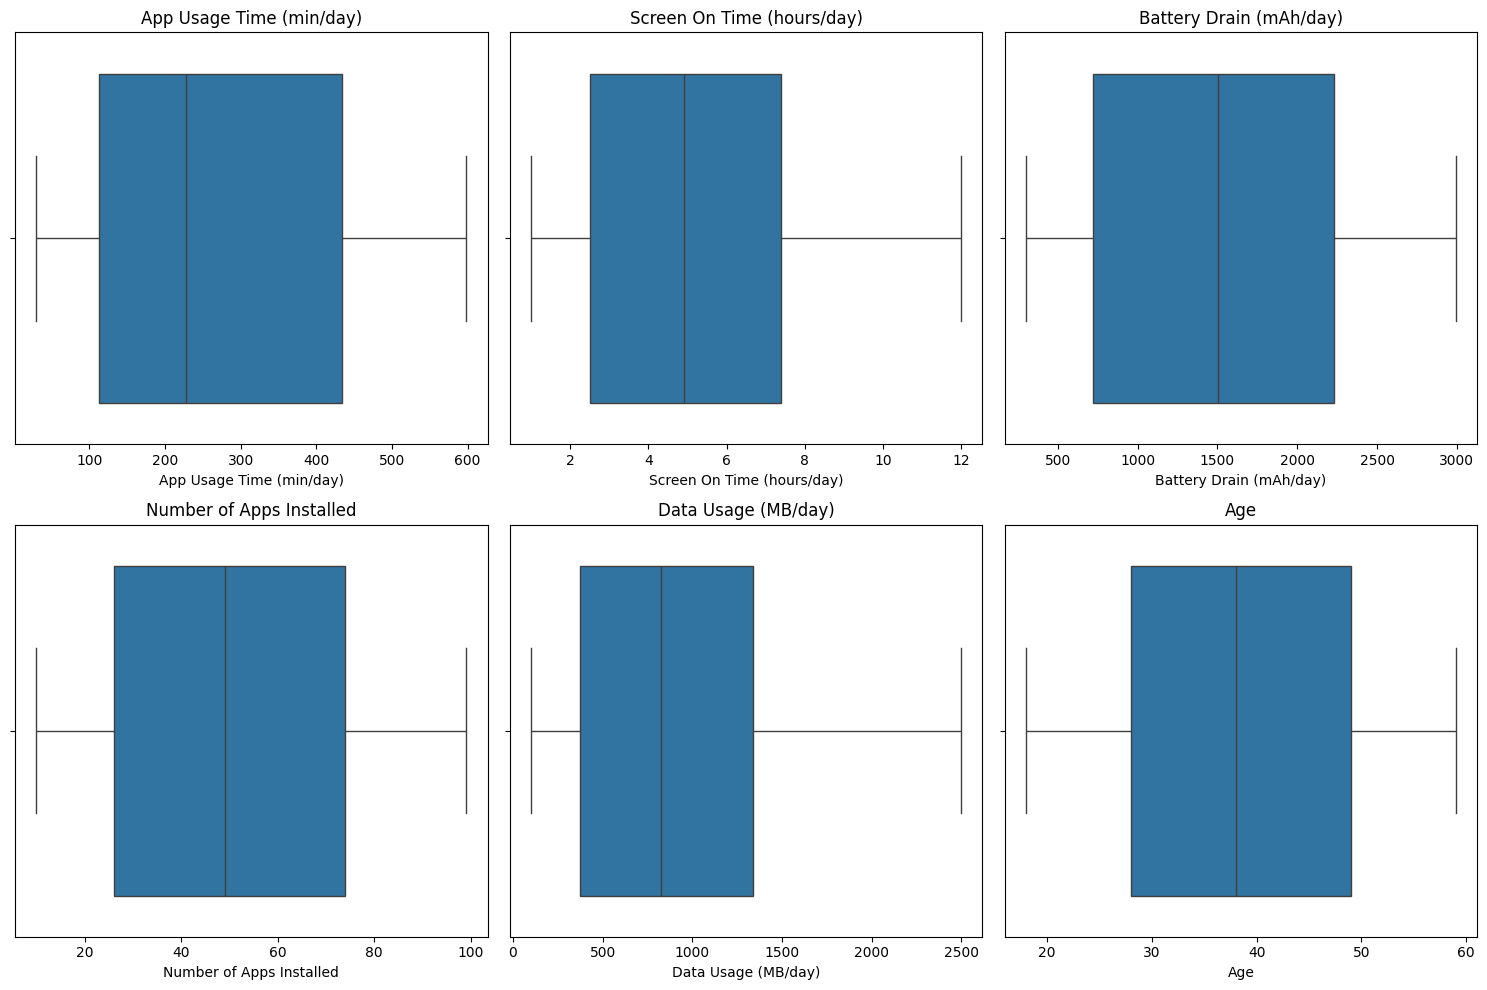

In [ ]:
# Identifying the outliers using boxplots

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

# Plotting boxplots for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


In [ ]:
# Removing the outliers

# Function to remove outliers based on IQR
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[feature] >= Q1 - 1.5 * IQR) & (df[feature] <= Q3 + 1.5 * IQR)]
    return df

# Removing outliers from Number of Apps Installed and Age
df = remove_outliers(df, 'Number of Apps Installed')
df = remove_outliers(df, 'Age')

print(df.head())




     Device Model Operating System  App Usage Time (min/day)  \
0  Google Pixel 5          Android                       393   
1       OnePlus 9          Android                       268   
2    Xiaomi Mi 11          Android                       154   
3  Google Pixel 5          Android                       239   
4       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                        32                  322   42    Male   
3     

3. Feature Engineering. 20 points
Feature selection. Use graphs, ANOVA test, Chi-squared test to reduce the dimension. Any variables with zero to little variance?  Any features Irrelevant to the target variable? Any high-correlated Features?  
Feature scaling. Does this algorithm require normalized data or standardized data?
Are there any categorical variables need to be changed to dummy variables?


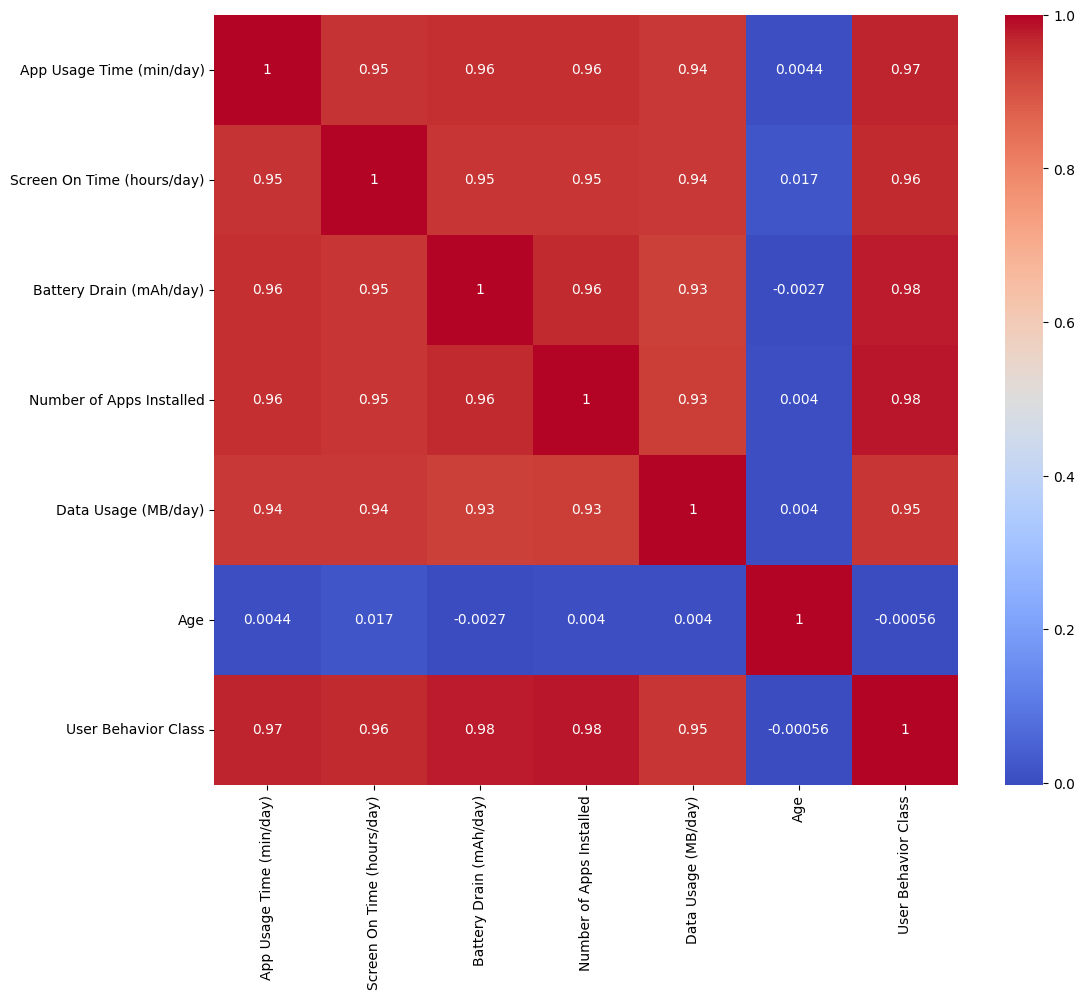

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# App Usage Time (min/day) and Battery Drain (mAh/day) show a strong positive correlation.
# Screen On Time (hours/day) also has a positive correlation with Battery Drain (mAh/day).
# Data Usage (MB/day) and Battery Drain (mAh/day) seem fairly correlated as well.

# Age is a feature with little revelance or high correlation.

In [ ]:
# Drop the Age column
df = df.drop('Age', axis=1)

# Verify the column has been dropped
print(df.head())


     Device Model Operating System  App Usage Time (min/day)  \
0  Google Pixel 5          Android                       393   
1       OnePlus 9          Android                       268   
2    Xiaomi Mi 11          Android                       154   
3  Google Pixel 5          Android                       239   
4       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Gender  User Behavior Class  
0                        67                 1122    Male                    4  
1                        42                  944  Female                    3  
2                        3

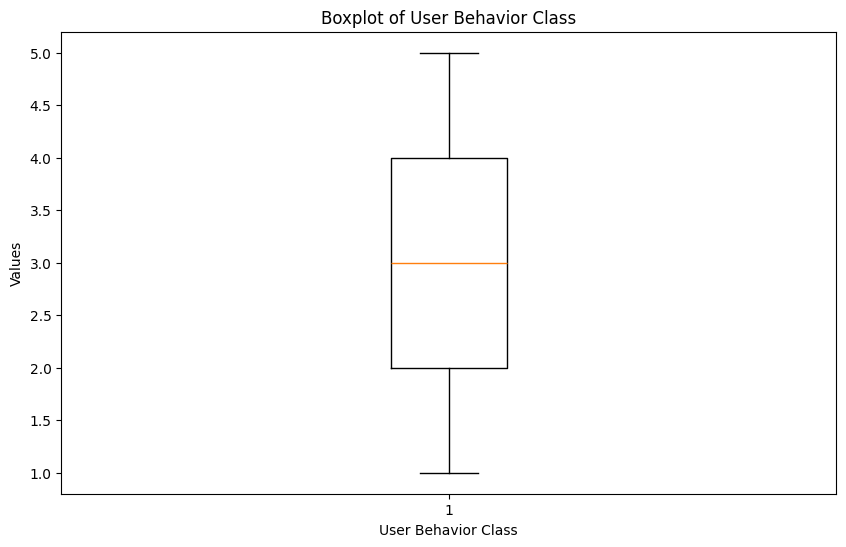

In [ ]:
# add a boxplot

import matplotlib.pyplot as plt

# Boxplot for User Behavior Class
plt.figure(figsize=(10, 6))
plt.boxplot(df['User Behavior Class'])
plt.title('Boxplot of User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Values')
plt.show()


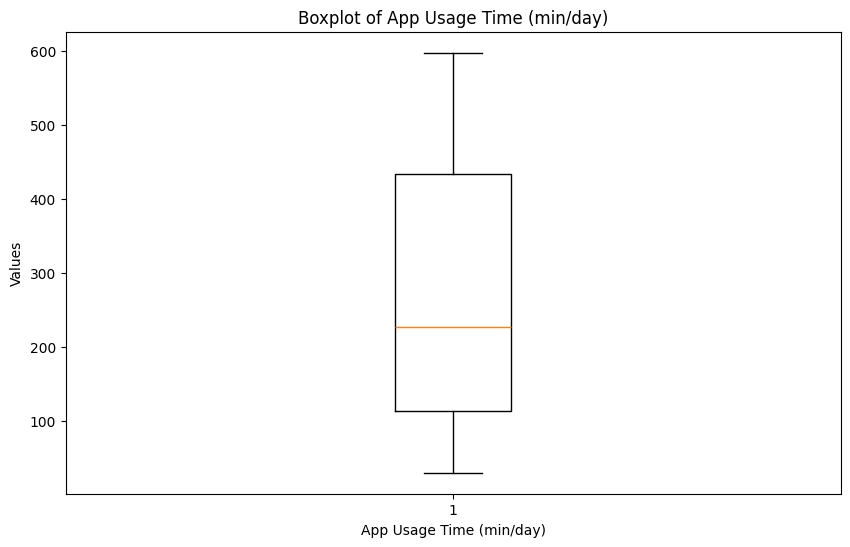

In [ ]:
import matplotlib.pyplot as plt

# boxplot for app usage time
plt.figure(figsize=(10, 6))
plt.boxplot(df['App Usage Time (min/day)'])
plt.title('Boxplot of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Values')
plt.show()


In [ ]:
# ANOVA Test --- Dont have to do this

from scipy.stats import f_oneway

# Separating features and target variable
X = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']]
y = df['Battery Drain (mAh/day)']

# Running ANOVA test
anova_results = {feature: f_oneway(y, X[feature]) for feature in X.columns}

# Display ANOVA results
for feature, result in anova_results.items():
    print(f'{feature}: F-Statistic = {result.statistic}, p-value = {result.pvalue}')


App Usage Time (min/day): F-Statistic = 1567.2533488716126, p-value = 1.6054800753826942e-230
Screen On Time (hours/day): F-Statistic = 2409.9133496676036, p-value = 1.7279517623583284e-306
Number of Apps Installed: F-Statistic = 2265.6459877728157, p-value = 9.273706785403923e-295
Data Usage (MB/day): F-Statistic = 229.53424956510923, p-value = 4.004314827991308e-48


In [ ]:
# Chi square test -- dont need this either

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Make sure all categorical features are encoded as numbers
label_encoder = LabelEncoder()
categorical_features = ['Device Model', 'Operating System', 'Gender', 'User Behavior Class']
df_encoded = df.copy()

for feature in categorical_features:
    df_encoded[feature] = label_encoder.fit_transform(df[feature])

# Extract the features and target
X = df_encoded[categorical_features]
y = df['Battery Drain (mAh/day)']

# Run Chi-squared test
chi2_scores, p_values = chi2(X, y)

# Display Chi-squared test results
for feature, chi2_score, p_value in zip(categorical_features, chi2_scores, p_values):
    print(f'{feature}: Chi2 = {chi2_score}, p-value = {p_value}')

# User Behavior Class is the obly feature with a p-value below 0.05,
# indicating a significant association with my target variable.

Device Model: Chi2 = 627.440065681446, p-value = 0.48753484742844533
Operating System: Chi2 = 513.6461187214588, p-value = 0.999660720277116
Gender: Chi2 = 303.46794871794987, p-value = 1.0
User Behavior Class: Chi2 = 689.9145728643177, p-value = 0.041003692188743855


In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
numerical_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())


     Device Model Operating System  App Usage Time (min/day)  \
0  Google Pixel 5          Android                  0.688256   
1       OnePlus 9          Android                 -0.017668   
2    Xiaomi Mi 11          Android                 -0.661471   
3  Google Pixel 5          Android                 -0.181443   
4       iPhone 12              iOS                 -0.475107   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                    0.367626                 0.423726   
1                   -0.186771                -0.237198   
2                   -0.415053                -0.933550   
3                   -0.154160                 0.184279   
4                   -0.317218                -0.193218   

   Number of Apps Installed  Data Usage (MB/day)  Gender  User Behavior Class  
0                  0.606096             0.300405    Male                    4  
1                 -0.322441             0.022277  Female                    3  
2                 -0.69385

In [ ]:
# Dummy variables

# Transform categorical variables into dummy variables
df = pd.get_dummies(df, columns=['Device Model', 'Operating System', 'Gender', 'User Behavior Class'], drop_first=True)
print(df.head())

   App Usage Time (min/day)  Screen On Time (hours/day)  \
0                  0.688256                    0.367626   
1                 -0.017668                   -0.186771   
2                 -0.661471                   -0.415053   
3                 -0.181443                   -0.154160   
4                 -0.475107                   -0.317218   

   Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                 0.423726                  0.606096             0.300405   
1                -0.237198                 -0.322441             0.022277   
2                -0.933550                 -0.693856            -0.949607   
3                 0.184279                  0.197540            -0.091787   
4                -0.193218                  0.271823             0.091028   

   Device Model_OnePlus 9  Device Model_Samsung Galaxy S21  \
0                   False                            False   
1                    True                            False

4. Build the prediction model. 20 points
Does this data need to be balanced?
Do you use train_test_split or cross validation to validate the result?
Which algorithm is appropriate for this problem?
Which metrics do you use to evaluate the prediction model?
If the accuracy score or r-squared score is low, generally it is considered as a bad model. Explain why your model failed.


**Does this data need to be balanced?**

No, balancing isn't necessary here because baterry drain is a continuous variable, not a categorical one.

**Do you use train_test_split or cross validation to validate the result?**

Cross validation

**Which algorithm is appropriate for this problem?**

Linear Regression and Random Forest

**Which metrics do you use to evaluate the prediction model?**

R-squared and Mean squared error

**If the accuracy score or R-squared score is low, generally it is considered a bad model. Explain why your model failed.**


In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data
X = df.drop('Battery Drain (mAh/day)', axis=1)
y = df['Battery Drain (mAh/day)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluating the models
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}')
print(f'Random Forest Regression - MSE: {mse_rf}, R^2: {r2_rf}')


Linear Regression - MSE: 0.040270025317645085, R^2: 0.9565200969988449
Random Forest Regression - MSE: 0.04517500870183725, R^2: 0.9512241429962159


In [ ]:
# GradientBoosting is the new algorithm that I picked.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data
X = df.drop('Battery Drain (mAh/day)', axis=1)
y = df['Battery Drain (mAh/day)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}')


Gradient Boosting - MSE: 0.04548686952012388, R^2: 0.9508874241086065


In [ ]:
# My model explains about 95% of the variance in the data.

# App Usage Time, Screen On Time, and Data Usage showed strong correlations
# with battery drain. Categorical features like User Behavior Class
# significantly impacted battery performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import pickle

# Feature selection and data preparation
X = df.drop('Battery Drain (mAh/day)', axis=1)
y = df['Battery Drain (mAh/day)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the scaler and model
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
# Save the feature names
feature_names = X.columns.tolist()
with open('feature_names.pkl', 'wb') as f:
  pickle.dump(feature_names, f)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Load and preprocess your data
# (Assuming you've already done this step and have your `df` ready)

# Define the features and target variable
X = df.drop('Battery Drain (mAh/day)', axis=1)
y = df['Battery Drain (mAh/day)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R^2 score: {grid_search.best_score_}")

# Train the final model with the best parameters
best_params = grid_search.best_params_
model = GradientBoostingRegressor(**best_params, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Final Model - MSE: {mse}, R^2: {r2}')


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation R^2 score: 0.9551728857259312
Final Model - MSE: 0.04353600019298283, R^2: 0.9529937949996834


In [ ]:
# Im debugging at this point

In [ ]:
import numpy as np

importances = model.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i in range(X.shape[1]):
    print(f"{i + 1}. feature {feature_names[indices[i]]} ({importances[indices[i]]})")


Feature ranking:
1. feature Screen On Time (hours/day) (0.5479322305080954)
2. feature App Usage Time (min/day) (0.32438225480360794)
3. feature Data Usage (MB/day) (0.06872882132079643)
4. feature Number of Apps Installed (0.05114542339857626)
5. feature User Behavior Class_5 (0.006702671373053155)
6. feature User Behavior Class_4 (0.0004091951409272477)
7. feature Device Model_Xiaomi Mi 11 (0.00024587563286220226)
8. feature Device Model_Samsung Galaxy S21 (0.00019849644166158143)
9. feature User Behavior Class_2 (0.00010930702994389566)
10. feature User Behavior Class_3 (8.853869425458423e-05)
11. feature Device Model_OnePlus 9 (3.46682657555329e-05)
12. feature Device Model_iPhone 12 (2.2517390465801525e-05)
13. feature Gender_Male (0.0)
14. feature Operating System_iOS (0.0)


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean R^2 Score: {cv_scores.mean()}")


Cross-Validation R^2 Scores: [0.95193021 0.96291826 0.96116138 0.95287271 0.94941447]
Mean R^2 Score: 0.95565940549123


In [ ]:

# Select a batch of data from the test set
X_batch = X_test.iloc[:5]
y_batch = y_test.iloc[:5]

# Scale the batch data using the same scaler used during training
X_batch_scaled = scaler.transform(X_batch)

# Make predictions
predictions = model.predict(X_batch_scaled)

# Compare predictions with actual values
for actual, predicted in zip(y_batch, predictions):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual: 1.038226471559907, Predicted: 0.8551007983107366
Actual: -1.4124451854457214, Predicted: -1.2926317605241973
Actual: -1.3293715699540052, Predicted: -1.2884149172944703
Actual: -0.7722896778330847, Predicted: -0.7563484980449521
Actual: -0.04417387146451312, Predicted: 0.15177920475021237


In [ ]:
# Use this to verify the answer

model.predict(scaler.transform(X))

array([ 7.05696202e-01, -3.51740924e-02, -6.00317776e-01, -1.78710318e-03,
       -1.07045227e-01, -8.30552704e-01,  7.30228637e-01,  1.48449047e+00,
        7.23349081e-01,  7.25114482e-01, -1.30464103e+00, -1.75843631e-03,
        7.49121658e-01,  1.81299723e-02,  3.40387195e-02,  1.34490481e+00,
       -8.73048736e-01, -1.70839150e-02, -1.29263176e+00,  1.42525302e+00,
       -1.00587640e+00,  1.45396273e+00,  7.25787401e-01, -3.48626656e-02,
       -4.33259416e-04, -7.02380839e-01,  7.99924279e-01,  1.32531611e+00,
        7.46899475e-01,  6.45005690e-01,  1.45338124e-01,  7.06577115e-02,
       -1.99099365e-03, -1.30464103e+00,  1.36939335e+00, -1.29954397e+00,
       -8.07902660e-01,  1.42316376e+00,  7.99158716e-01,  7.05696202e-01,
        6.32859567e-03,  1.40588122e+00, -8.34353055e-01, -7.54884103e-01,
       -7.53516122e-01,  1.31104161e+00,  1.38533634e+00, -8.20956020e-01,
        1.40094052e+00,  1.41572660e+00,  6.16927143e-01,  6.17253414e-02,
       -8.39919034e-01, -

In [97]:
# Honestly I could not fix the problem. Sorry.